In [1]:
%load_ext autoreload
%autoreload 2

# Comparisons - SD Model Versions


In [2]:
from src import helpers, interactive

PyTorch version: 2.0.1+cu117


GridBox(children=(Dropdown(description='model', layout=Layout(display='none', width='95%'), options=('stabilit…

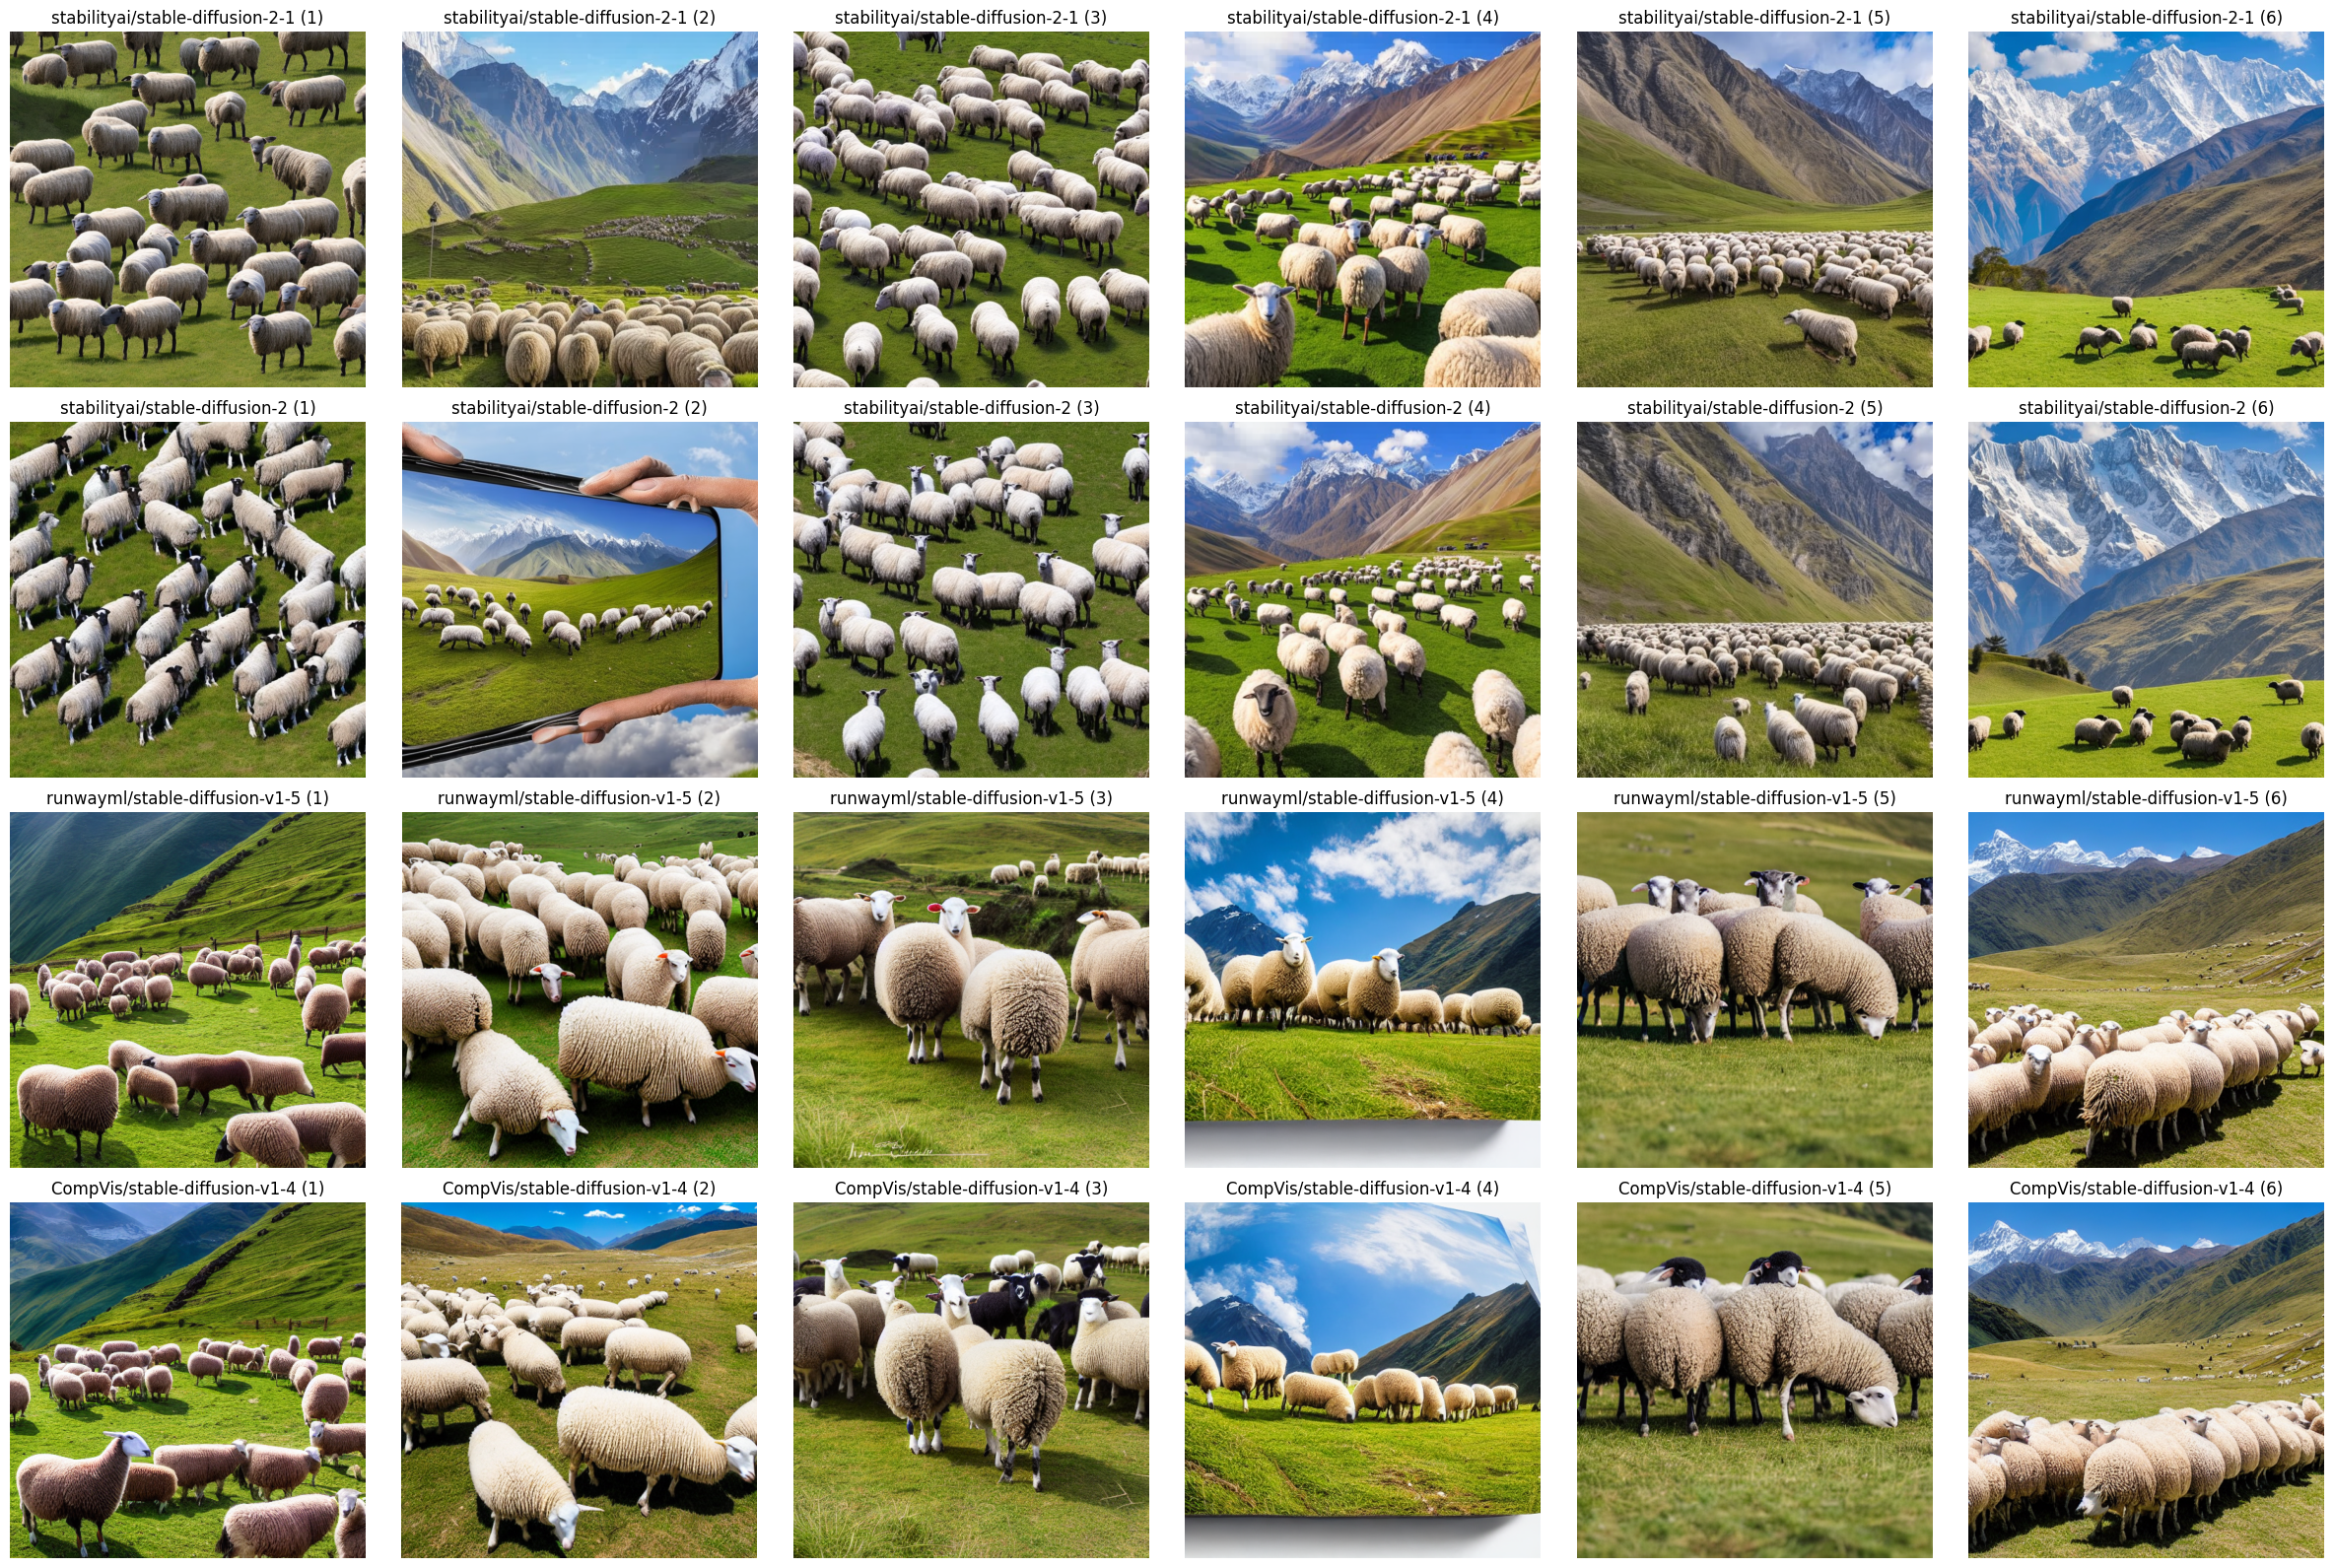

In [ ]:
icp = interactive.InteractivePipeline()
# We don't want to change the model & scheduler through the UI
icp.w_model.layout.display = "none"
icp.w_scheduler.layout.display = "none"
# We want the same seed for all runs
icp.w_seed.disabled = True
icp.w_seed.value = 123


def run_callback():
    # Function to run when the Run button is pressed
    imgs, captions = [], []

    # Looping through all the models
    # Note: here we use the available models from the interactive pipeline options directly,
    #       but you can also use a separate list of models
    for m in icp.w_model.options:
        imgs.extend(icp(model=m))
        captions.extend([f"{m} ({i + 1})" for i in range(icp.num_images_per_prompt)])

    icp.show()
    helpers.plot(
        imgs,
        captions=captions,
        n_rows=len(icp.w_model.options),
        fname="plot_grid_models",
    )


# We bind our callback function to the run button
icp.on_run = run_callback
icp.show()